<a href="https://colab.research.google.com/github/santhosh1728/FML/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-8fe577e41d61>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
<ipython-input-1-8fe577e41d61>:59: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


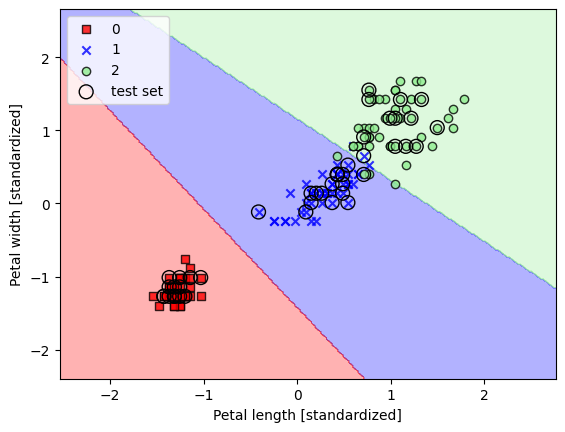

In [1]:
 from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from distutils.version import LooseVersion

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and petal width
y = iris.target  # Target labels (species)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # For prediction
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Scatter plot for each class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # Highlight test examples
    if test_idx:
        # Plot all test examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        # Use matplotlib.__version__ instead of _version_
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')

# Train an SVM classifier with a linear kernel
svm = SVC(kernel='linear', C=0.1, random_state=1)#decision boundaries are linerar
svm.fit(X_train_std, y_train)

# Combine the training and test data for plotting
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Plot the decision regions
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

#svm for multi classification through one v/s all approach as it is specifically for binary classification


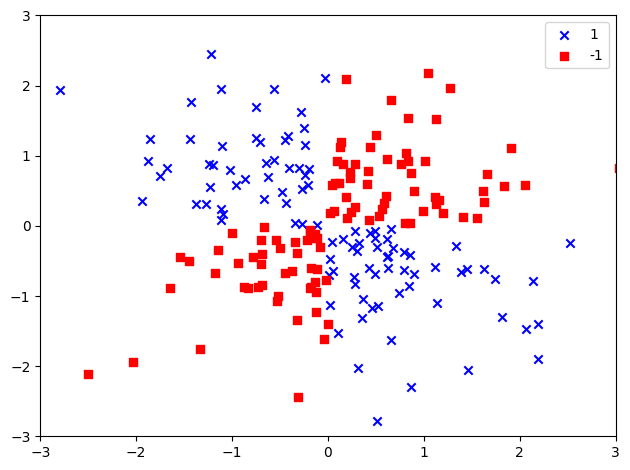

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Setting the seed for reproducibility
np.random.seed(1)

# Generate XOR dataset
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# Plotting the XOR dataset
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

# Set the limits of the plot
plt.xlim([-3, 3])
plt.ylim([-3, 3])

# Adding a legend
plt.legend(loc='best')

# Ensuring the layout is tight and nothing is clipped
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-3-c330d907288c>:51: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


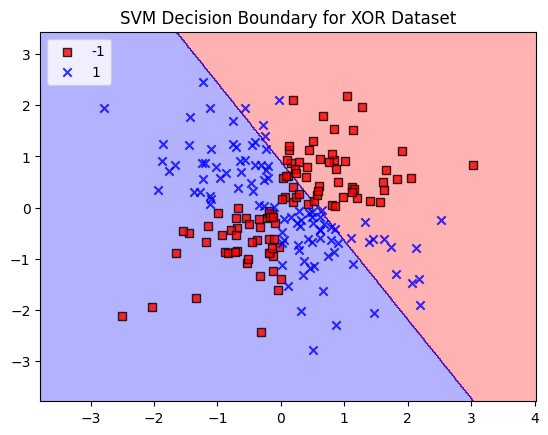

<ipython-input-3-c330d907288c>:51: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
<ipython-input-3-c330d907288c>:64: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


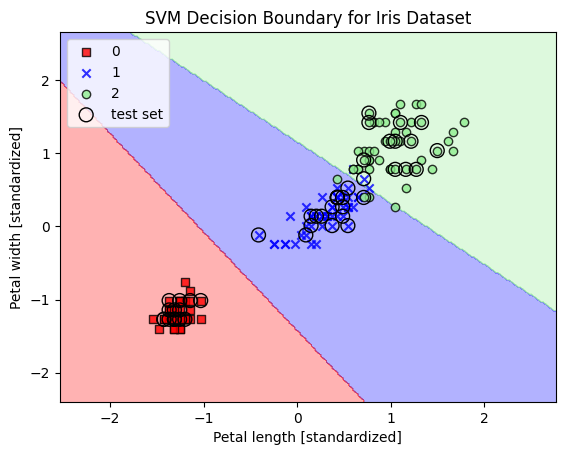

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion

# Set random seed for reproducibility
np.random.seed(1)

# XOR dataset generation
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and petal width
y = iris.target  # Target labels (species)

# Split the Iris dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Standardize the features for the Iris dataset
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']  # Ensure this list is sufficient for the number of classes
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # For prediction
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Scatter plot for each class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # Highlight test examples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        # Ensure compatibility for older matplotlib versions
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
        else:
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

# Train an SVM classifier on XOR data
svm_xor = SVC(kernel='linear', random_state=1, C=1.0)
svm_xor.fit(X_xor, y_xor)

# Plot decision regions for XOR dataset
plot_decision_regions(X_xor, y_xor, classifier=svm_xor)
plt.legend(loc='upper left')
plt.title("SVM Decision Boundary for XOR Dataset")
plt.show()

# Train an SVM classifier on Iris data
svm_iris = SVC(kernel='linear', C=0.1, random_state=1)
svm_iris.fit(X_train_std, y_train)

# Combine the training and test sets for plotting
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Plot decision regions for Iris dataset
plot_decision_regions(X_combined_std, y_combined, classifier=svm_iris, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.title("SVM Decision Boundary for Iris Dataset")
plt.show()


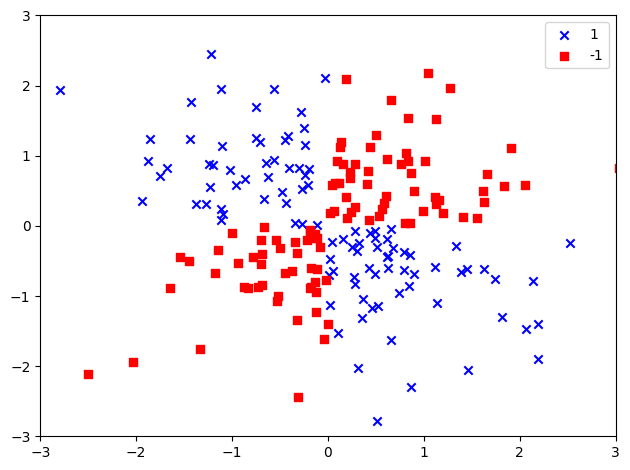

<ipython-input-4-bac4b959cba0>:46: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=colors[idx],


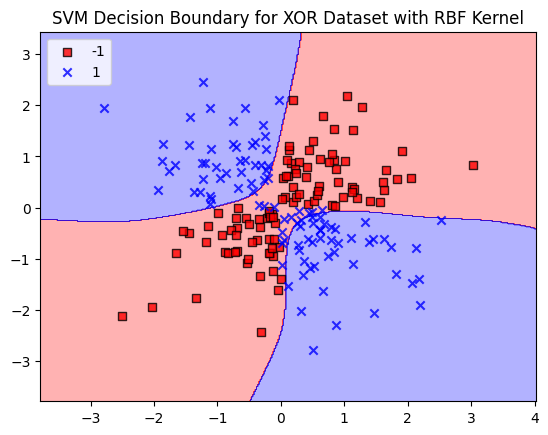

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Generate XOR dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)  # Generate random XOR data
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)  # XOR condition
y_xor = np.where(y_xor, 1, -1)  # Convert Boolean to -1 and 1

# Plot the XOR dataset
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, random_state=1, gamma=0.5)
svm_rbf.fit(X_xor, y_xor)

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Create meshgrid for plotting decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # Predictions
    Z = Z.reshape(xx1.shape)

    # Plot the decision surface
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot the data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

# Plot decision regions for XOR dataset using RBF SVM
plot_decision_regions(X_xor, y_xor, classifier=svm_rbf)
plt.legend(loc='upper left')
plt.title("SVM Decision Boundary for XOR Dataset with RBF Kernel")
plt.show()


<ipython-input-5-caa25fdfbfe8>:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,


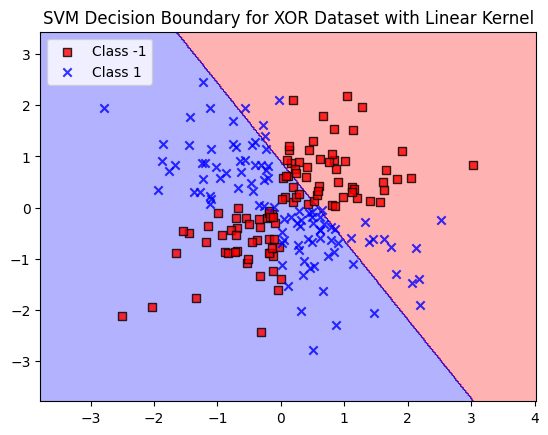

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion
import matplotlib

# Generate XOR dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)  # Generate random XOR data
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)  # XOR condition
y_xor = np.where(y_xor, 1, -1)  # Convert Boolean to -1 and 1

# Define the function to plot decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']  # List of colors for the classes
    cmap = ListedColormap(colors[:len(np.unique(y))])  # Define a colormap based on the unique classes

    # Create meshgrid for plotting decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # Predictions
    Z = Z.reshape(xx1.shape)

    # Plot the decision surface
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot the data points for each class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx],
                    label=f'Class {cl}', edgecolor='black')

    # Highlight test examples (if provided)
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                        linewidth=1, marker='o', s=100, label='test set')
        else:
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                        linewidth=1, marker='o', s=100, label='test set')

# Train an SVM classifier on XOR data
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_xor, y_xor)

# Plot decision regions for XOR dataset using the trained SVM
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.title("SVM Decision Boundary for XOR Dataset with Linear Kernel")
plt.show()


<ipython-input-6-68fedb83da77>:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


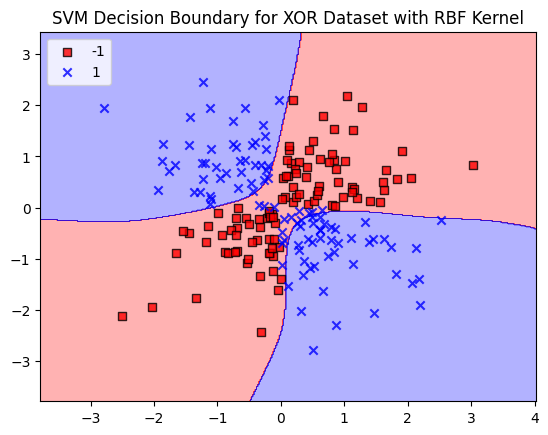

In [6]:
from sklearn.svm import SVC
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Create meshgrid for decision boundary plotting
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Predictions for the meshgrid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plot decision surface
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot the data points for each class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # Highlight test set examples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

# Generate XOR dataset
np.random.seed(1)
X_xor = np.random.randn(200, 2)  # Random XOR data
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)  # XOR condition
y_xor = np.where(y_xor, 1, -1)  # Convert to 1 and -1

# Use an RBF kernel SVM (non-linear kernel)
svm = SVC(kernel='rbf', C=1.0, gamma=0.5, random_state=1)

# Train the model
svm.fit(X_xor, y_xor)

# Plot decision regions with the trained SVM (RBF kernel)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.title("SVM Decision Boundary for XOR Dataset with RBF Kernel")
plt.show()


<ipython-input-7-766454fe45ae>:39: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


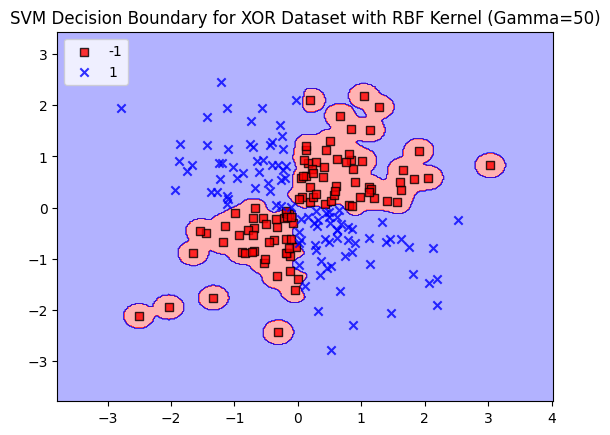

In [7]:
from sklearn.svm import SVC  # Import the Support Vector Classifier from sklearn
import numpy as np  # Import numpy for numerical operations
from matplotlib.colors import ListedColormap  # For color maps in the plot
import matplotlib.pyplot as plt  # For plotting the decision boundaries

# Function to plot decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """
    This function visualizes the decision regions for a classifier.
    X: Feature matrix (2D array) where each row represents a data point.
    y: Labels (target vector).
    classifier: The trained classifier (e.g., SVC).
    test_idx: Indices of the test samples (optional, to highlight test points).
    resolution: Resolution for the mesh grid for plotting.
    """
    markers = ('s', 'x', 'o', '^', 'v')  # Define marker styles for each class
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']  # Define colors for each class
    cmap = ListedColormap(colors[:len(np.unique(y))])  # Create a colormap based on the unique class labels

    # Define the range of values for the x1 (feature 1) and x2 (feature 2) axes
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid based on the x1 and x2 ranges for plotting decision boundaries
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Predict the class labels for each point in the mesh grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)  # Reshape the result to match the grid's shape

    # Plot the decision surface with contour plot
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())  # Set x-axis limits
    plt.ylim(xx2.min(), xx2.max())  # Set y-axis limits

    # Plot the data points for each class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,  # Display class label in the legend
                    edgecolor='black')

    # Highlight the test set points (if indices are provided)
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

# Generate the XOR dataset
np.random.seed(1)  # Set the random seed for reproducibility
X_xor = np.random.randn(200, 2)  # Generate 200 random 2D data points (features)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)  # XOR condition to create labels
y_xor = np.where(y_xor, 1, -1)  # Convert Boolean values to -1 and 1 labels

# Create and train the Support Vector Machine classifier using RBF kernel
svm = SVC(kernel='rbf', C=1.0, random_state=1, gamma=50)  # Create an SVM with RBF kernel
svm.fit(X_xor, y_xor)  # Train the SVM model

# Plot the decision regions using the trained model
plot_decision_regions(X_xor, y_xor, classifier=svm)

# Display the legend and the plot title
plt.legend(loc='upper left')  # Place the legend in the upper left corner
plt.title("SVM Decision Boundary for XOR Dataset with RBF Kernel (Gamma=50)")  # Title of the plot
plt.show()  # Show the plot

# Notes:
# - We are using the RBF kernel, which can handle non-linearly separable data.
# - The `gamma` parameter is set to 50. A high value of `gamma` may cause overfitting.
# - It's important to tune `gamma` and `C` to achieve the best model performance.
# - The `C` parameter is used to control the margin width and misclassification tolerance.


finds decision boundary to seperate the different classes by a line in middle of support vectors so that we have enough margin on the both the sides
Support vectors-nearest to the boundary line